<p style="font-family: Arial; font-size:2.5vw;color:purple; font-style:bold"><br>
Classification of kickstarter projects using scikit-learn
</p><br>

# Kickstarter project funding analysis

In this notebook, we will use sci-kit learn to perform a decision tree based binary classificiation of kickstarter project success.

The research question we're trying to answer is : how can we determine the outcome of a kickstarter project?

Import the necessary libraries.

In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Create a pandas dataframe from ks-projects-201801.csv in the same directory as our notebook.

In [34]:
data = pd.read_csv('ks-projects-201801.csv')

# Kickstarter project description

Let's take a look at the columns.

In [35]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

For more information about the columns, feel free to check out https://www.kaggle.com/kemical/kickstarter-projects

Let's take a look at the first 5 rows.

In [36]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Let's also take a look at the last 5 rows.

In [37]:
#data.tail()

In [38]:
data.shape

(378661, 15)

In [39]:
data.isnull().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

We have null values in the name and usd_pledged columns. Let's get rid of these rows.

In [40]:
data = data.dropna()

In [45]:
data.isnull().any()
data.groupby('launched').size()
data.sort_values('launched', ascending=True).head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,500.00
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.0,0.0,1905.97
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,5000.00
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,4000.00
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,700.00
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,10000.00
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,15000.00
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,625.0,failed,30,US,625.0,625.0,1000.00
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,22.0,failed,3,US,22.0,22.0,80000.00
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,35.0,successful,3,US,35.0,35.0,20.00


Let's make a few changes to our date columns to add a new one for the number of days a kickstarter has been live.

In [10]:
# create a new column for launch date without timestamps
data['launched'] = pd.to_datetime(data['launched'], errors='coerce')
data['launch_date'] = data['launched'].dt.date
# convert deadline to datetime object
data['deadline'] = pd.to_datetime(data['deadline'])
data['deadline'] = data['deadline'].dt.date
# calculate the number of days a kickstarter has been running
data['days_live'] = data['deadline'].sub(data['launch_date'], axis=0)
data['days_live'] = data['days_live'] / np.timedelta64(1, 'D')
#data.head()

In [11]:
data.shape

(374860, 17)

# Data cleaning

We can get rid of a few unwanted columns for the purposes of this assignment like main_category, currency, goal, and usd pledged.

In [22]:
#del data['launched']
del data ['currency']
del data['goal']
del data['pledged']
del data['usd pledged']

KeyError: 'currency'

In [13]:
#data.head()

# Descriptive statistics

Let's take a closer look at how certain features are correlated.

In [14]:
data['usd_pledged_real'].describe()

count    3.748600e+05
mean     9.120899e+03
std      9.131969e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.244950e+02
75%      4.050895e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64

On average, kickstarters receive $9,120 USD in funding.

In [15]:
data['days_live'].describe()

count    374860.000000
mean         34.497682
std          66.232139
min           1.000000
25%          30.000000
50%          30.000000
75%          37.000000
max       16739.000000
Name: days_live, dtype: float64

On average, kickstarters are live for 34 days.

In [16]:
data['backers'].describe()

count    374860.000000
mean        106.688366
std         911.710124
min           0.000000
25%           2.000000
50%          12.000000
75%          57.000000
max      219382.000000
Name: backers, dtype: float64

On average, kickstarters have 106 backers.

Let's take a look at when the first kickstarter was launched.

In [21]:
data.sort_values('launch_date', ascending=True).head()
data.sort_values('days_live', ascending=True).head()

,ID,name,category,main_category,deadline,state,backers,country,usd_pledged_real,usd_goal_real,launch_date,days_live
357036,888830641,Recording New Composition in Ireland,Classical Music,Music,2017-06-22,failed,0,US,0.00,1500.00,2017-06-21,1.0
74446,1379346088,Bug's Big Adventure: Mexico Edition,Art,Art,2016-11-12,successful,7,MX,16.41,0.49,2016-11-11,1.0
372363,967507244,Cookie Fury : The 3.5$ Game,Tabletop Games,Games,2017-08-06,canceled,2,FR,7.06,81.18,2017-08-05,1.0
321131,705241919,The Right to Photograph & Record in Public,Photo,Journalism,2015-04-15,failed,3,US,231.00,1200.00,2015-04-14,1.0
257510,379385592,le chocolat,Food,Food,2017-01-06,successful,1,GB,1494.73,1483.61,2017-01-05,1.0


Some kickstarters have a launch date before the platform was even launched. I'm not sure of the reason behind this. Normally, we would exclude these results from our analysis but for simplicity, we will keep it as is.

In [18]:
data.corr()

,ID,backers,usd_pledged_real,usd_goal_real,days_live
ID,1.000000,0.000673,-0.000016,0.001868,-0.001180
backers,0.000673,1.000000,0.753449,0.004476,-0.000821
usd_pledged_real,-0.000016,0.753449,1.000000,0.005566,0.000918
usd_goal_real,0.001868,0.004476,0.005566,1.000000,0.004176
days_live,-0.001180,-0.000821,0.000918,0.004176,1.000000


As expected, the number of backers is strongly correlated to the pledged amount and there is no relation between any of the other attributes.

# Data visualization

Let's perform some analysis to determine the 10 most popular kickstarters of all time. As we saw before, the number of backers gives us a good idea of the popularity of a kickstarter.

In [19]:
pop_ks = data.sort_values('backers', ascending=False)
#pop_ks.head(10)

The Exploding Kittens table top game is the most popular kickstarter of all time with 219,382 backers.

Let's make a bar chart to visualize these 10 kickstarters in terms of the number of backers gained.

KeyboardInterrupt: 

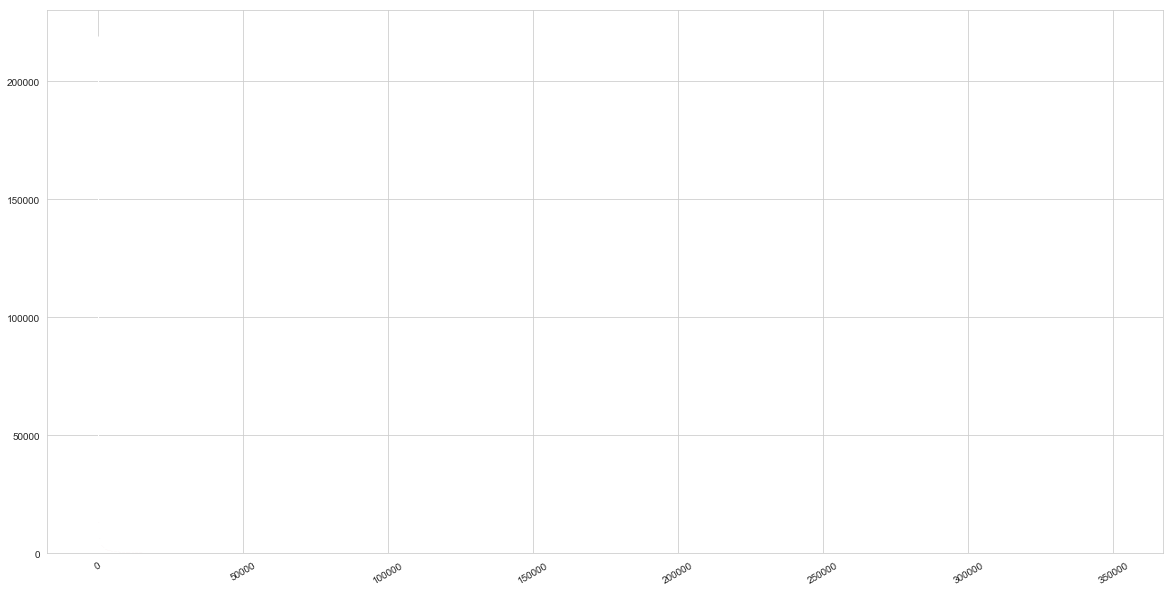

In [20]:
pop_ks['abbr_name'] = pop_ks['name'].apply(lambda x: ' '.join(x.split()[:3]))
sb.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
chart = sb.barplot(x='abbr_name', y='backers', data=pop_ks)
chart.axes.set_title('Top 10 Kickstarters of All Time', fontsize=40)
chart.set_xlabel('Project Name', fontsize=30)
chart.set_ylabel('# of Backers', fontsize=30)

Let's investigate summary statistics and the distribution of backers gained on various kickstarters.

In [ ]:
sorted_backers = sorted(list(data['backers']), reverse=True)
plt.hist(sorted_backers, bins=50, log=True)

Notice that the majority of kickstarters have a low count of backers.

Let's visualize the correlation between the number of backers and pledged amounts.

In [ ]:
chart = sb.jointplot(x='backers', y='usd_pledged_real', data=data)

As the scatterplot shows, there is a medium to strong to strong correlation between the 2 quantities.

Let's take a look at the number of backers and pledged amounts on the 10 highest pledged kickstarters of all time.

In [ ]:
highest_pledges = data.sort_values('usd_pledged_real', ascending=False)
#highest_pledges.head(10)

The Pebble smartwatch generated the highest pledge amount. But this doesn't tell us much since some kickstarters simply require more funding that others.

Let's define a new feature usd_pledge_excess as the difference between the pledge goal and the raised amount. 


Which kickstarters tend to attract the most 'hype'? For the purposes of this assignment, we will define it as the ratio of the number of backers to the excess pledge amount. We will then see which kickstarters have the largest 'hype'.

In [ ]:
data['usd_pledge_excess'] = data['usd_pledged_real'] - data['usd_goal_real']
data['hype'] = data['usd_pledge_excess']/data['backers']

In [ ]:
most_hype = data.sort_values('hype', ascending=False)
#most_hype.head(10)

This analysis provides some predictable and interesting insights. The kickstarter that garnered the most hype was actually suspended for reasons unknown. We may be able to find a correlation through some further analysis, which is outside the scope of this assignment. Almost half of the kickstarters in the top 10 are technology themed, which isn't too surprising.

# Data preparation for classifying

We want to set the state column as our target but let's list the unique values of that column first.

In [ ]:
data.state.unique()

There are more than 2 values here, but to train our model we will only consider kickstarters which have failed or succeeded.

Let's filter out kickstarters that don't have a state as 'failed' or 'successful'.

In [ ]:
bool_data = data[(data['state'] == 'failed') | (data['state'] == 'successful')]
bool_data.state.unique()

To simplify things, we will convert 'successful' and 'failed' to 1 and 0 respectively.

In [ ]:
bool_data_copy = bool_data.copy()
bool_data_copy['state'] = (bool_data_copy['state'] == 'successful')*1
#bool_data_copy.head()

The target is stored in y.

In [ ]:
y=bool_data_copy[['state']].copy()

Let's make sure the boolean values match with the original values.

In [ ]:
bool_data['state'].head()

In [ ]:
y.head()

In [ ]:
# we're only using 3 features for now, but we can always add more if needed
input_features = ['days_live','backers','usd_goal_real']

In [ ]:
X = bool_data_copy[input_features].copy()

In [ ]:
X.columns

In [ ]:
y.columns

# Training phase

Let's use the same values for test_size, random_states, and max_leaf_nodes as the weather data classification example from week 7 to maintain consistency. We can always tweak as needed.

Perform test and train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

Fit on train set

In [ ]:
state_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
state_classifier.fit(X_train, y_train)

In [ ]:
type(state_classifier)

Predict on test set

In [ ]:
predictions = state_classifier.predict(X_test)

In [ ]:
predictions[:20]

In [ ]:
y_test['state'][:20]

From a sample of 20 predictions, 19 are correct so our model excellent. Let's verify this using the accuracy score.

In [ ]:
accuracy_score(y_true = y_test, y_pred = predictions)

We can conclude that our model is quite accurate and any changes we make are completely optional.

# Fine tuning

Let's take a look at which features have the most weight in our model.

In [ ]:
print(dict(zip(X_train, state_classifier.feature_importances_)))

Apparently, the number of days a kickstarter has been up and running does not matter. Theoretically, removing this feature from our input features should have no effect on the predictions.

In the future, I would consider converting main_category values to binary using one hot encoding as some categories do better than others.